In [5]:
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings("ignore")

In [6]:
df = pd.read_csv('data_Morgan_1.csv')
df.head()

,0,1,2,3,4,5,6,7,8,9,...,2039,2040,2041,2042,2043,2044,2045,2046,2047,Activity
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df2 = pd.read_csv('rdkit_descriptors_208_with_activity.csv')
df2.drop('Activity', axis = 1, inplace = True)
df2.head()

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,14.607685,-1.275102,14.607685,0.137208,0.893230,331.347,313.203,331.133220,126,0,...,0,0,0,0,0,0,0,0,0,0
1,10.427986,-0.635752,10.427986,0.196415,0.384874,325.737,317.673,325.003638,108,0,...,0,0,0,0,0,0,0,0,0,0
2,10.505713,-0.632032,10.505713,0.204419,0.353751,350.356,336.244,350.068491,126,0,...,0,0,0,0,0,0,0,0,0,0
3,10.420390,-0.618689,10.420390,0.256214,0.388807,290.304,280.224,290.047361,102,0,...,0,0,0,0,0,0,0,0,0,0
4,10.461498,-0.631261,10.461498,0.201693,0.319099,449.084,442.028,446.863634,114,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
df = pd.concat([df, df2], axis = 1)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
df.shape

(23791, 2257)

In [10]:
df.dropna(inplace=True)

In [11]:
df.shape

(23684, 2257)

In [12]:
# Get columns with null values
null_columns = df.columns[df.isnull().any()].tolist()

# Print the columns with null values
print("Columns with null values:", null_columns)

for i in null_columns:
    print(df[i].isnull().mean()*100)

Columns with null values: []


In [13]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler



# Display the shape and summary of the DataFrame before dropping missing values
print(f'Shape before dropping NaN values: {df.shape}')
print(df.describe())

# Drop rows with missing values
df.dropna(inplace=True)
print(f'Shape after dropping NaN values: {df.shape}')

# Prepare features and target variable
X = df.drop(['Activity'], axis=1)
y = df['Activity']
print(f'Shape of X: {X.shape}')
print(f'Shape of y: {y.shape}')

# Scale the features to be between 0 and 1
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Print the statistics of X after scaling
print("Statistics of X after Min-Max scaling (0 to 1):")
print(X_scaled.describe())

# Include target variable and update df
df = X_scaled.copy()
df['Activity'] = y.reset_index(drop=True)

# Display the updated DataFrame
print("Updated DataFrame with scaled features and activity:")
print(df.head())


Shape before dropping NaN values: (23684, 2257)
                  0             1             2             3             4  \
count  23684.000000  23684.000000  23684.000000  23684.000000  23684.000000   
mean       0.005784      0.164795      0.048978      0.009458      0.010556   
std        0.075837      0.371003      0.215827      0.096793      0.102199   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

                  5             6             7             8             9  \
count  23684.000000  23684.000000  23684.000000  23684.000000  23684.000000   
mean       0.028880      0.008613      0.006713      0.021660      0.011949   
std

Model Accuracy: 0.89
Top 20 Most Important Descriptors:
NumHeteroatoms         0.235258
PEOE_VSA5              0.148568
MinAbsEStateIndex      0.148543
VSA_EState7            0.138453
MinAbsPartialCharge    0.136262
VSA_EState4            0.136159
SlogP_VSA8             0.129301
qed                    0.128043
PEOE_VSA7              0.126369
EState_VSA3            0.124622
SMR_VSA9               0.121923
SlogP_VSA1             0.121747
BalabanJ               0.117002
1665                   0.114215
PEOE_VSA9              0.111923
Kappa3                 0.111874
EState_VSA8            0.111429
BCUT2D_LOGPLOW         0.110930
VSA_EState5            0.110495
BCUT2D_MRLOW           0.107581
dtype: float32


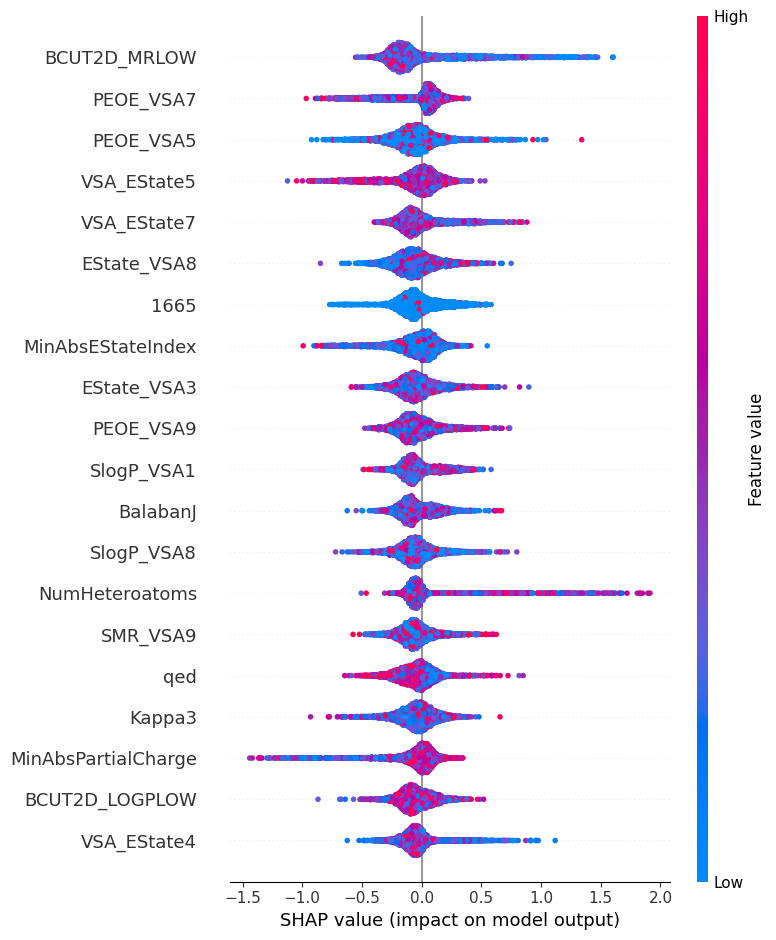

<Figure size 640x480 with 0 Axes>

In [34]:
import xgboost as xgb
import shap
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Define features and target
X = df.drop('Activity', axis=1)  # Replace 'Activity' with the name of your target column
y = df['Activity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the best parameters
best_params = {
    'max_depth': 12,
    'n_estimators': 207,
    'scale_pos_weight': 2.2233911067827616,
    'random_state': 42
}

# Train the XGBoost model with the best parameters
model = xgb.XGBClassifier(**best_params)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Initialize the SHAP explainer
explainer = shap.TreeExplainer(model)

# Calculate SHAP values for the test data
shap_values = explainer.shap_values(X_test)

# Convert SHAP values to a DataFrame
shap_df = pd.DataFrame(shap_values, columns=X_test.columns)

# Calculate the mean absolute SHAP values for each feature
shap_summary = shap_df.abs().mean().sort_values(ascending=False)

# Get the top 20 most important descriptors
top_20_features = shap_summary.head(20)

# Print the top 20 features and their importance
print("Top 20 Most Important Descriptors:")
print(top_20_features)

# Plot the top 20 most important descriptors
plt.figure(figsize=(7, 5))  # Increase figure size
shap.summary_plot(shap_values[:, shap_df.columns.isin(top_20_features.index)], X_test[top_20_features.index])

# Save the plot with higher resolution
plt.savefig('shap_summary_plot.png', dpi=300)

# Optionally, display the plot inline if using Jupyter
plt.show()
